In [1]:
library(dplyr)
library(tidyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [16]:
filepath <- '/Users/cyz/survey/active_survey/'

screeplot <- function(pca, dataset, linetype='h') {
    options(repr.plot.width=4, repr.plot.height=3)
    pca_var <- pca$sdev^2
    plot(pca_var, xlab = "Principal component", ylab = "Variance explained", type = linetype, 
         main = dataset)
}

cumul_screeplot <- function(pca, dataset, linetype='h') {
    options(repr.plot.width=4, repr.plot.height=3)
    pca_var <- pca$sdev^2
    pca_cumvar <- cumsum(pca_var) / sum(pca_var)
    plot(pca_cumvar, xlab = "Principal component", ylab = "Cumul variance explained", type = linetype, 
         ylim = c(0, 1),
         main = dataset)
    abline(0, 1/length(pca_cumvar), lty=2, col = "red")
}

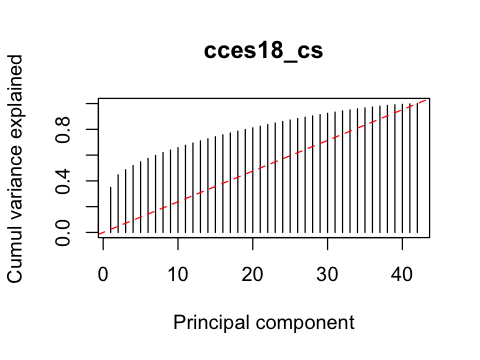

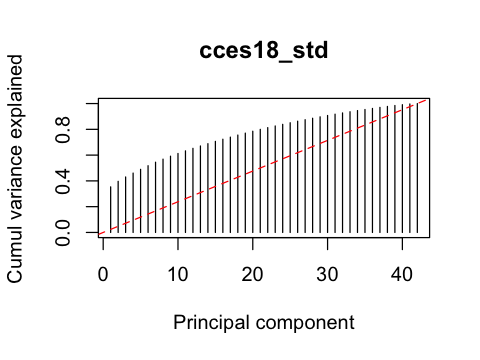

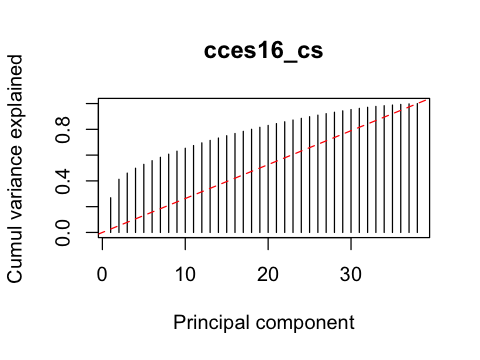

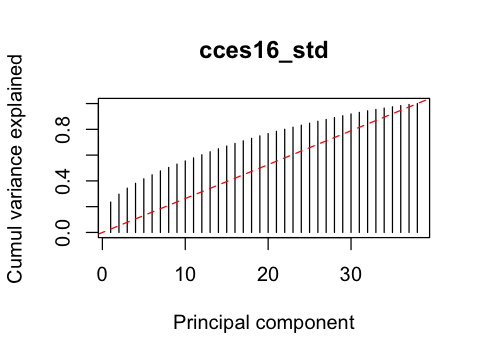

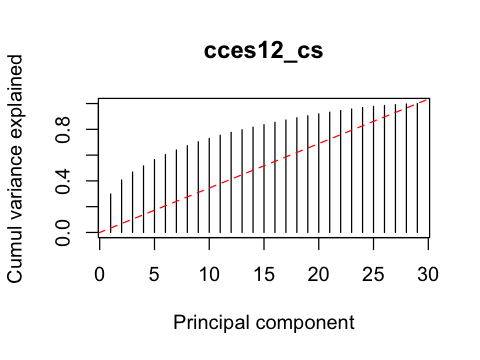

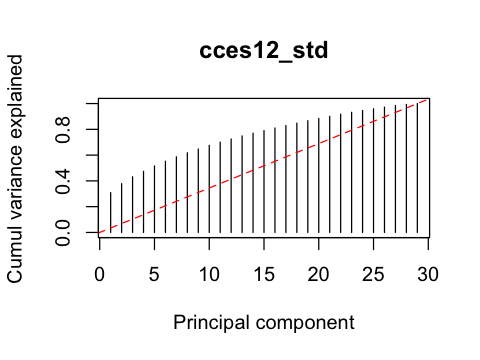

In [18]:
# Compare to CCES16
for (dataset in c('cces18_cs', 'cces18_std', 'cces16_cs', 'cces16_std', 'cces12_cs', 'cces12_std')) {
    response_filename <- paste0('data/cces/', dataset, '.csv')
    responses <- read.csv(paste0(filepath, response_filename))
    dim(responses)
    responses <- responses %>% select(-X) %>% drop_na()
    pca <- prcomp(responses, center = F, scale = F)
#     screeplot(pca, dataset)
    cumul_screeplot(pca, dataset)
}